In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [ ]:
df_oring = pd.read_csv("customer_purchase_data.csv")
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [ ]:
# remove all decimial points up in columns AnnualIncome and TimeSpentOnWebsite
df_oring['AnnualIncome'] = df_oring['AnnualIncome'].astype(int)
df_oring['TimeSpentOnWebsite'] = df_oring['TimeSpentOnWebsite'].astype(int)
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


In [ ]:
# Checking for missing values
print(df_oring.isnull().sum())


Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [ ]:
# make a new dataframe without the Gender and ProductCategory columns
df = df_oring.drop(['Gender', 'ProductCategory'], axis=1)
df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,66120,8,30,0,5,1
1,20,23579,4,38,0,5,0
2,27,127821,11,31,1,0,1
3,24,137798,19,46,0,4,1
4,31,99300,19,19,0,0,1
...,...,...,...,...,...,...,...
1495,39,65048,13,34,0,5,1
1496,67,28775,18,17,0,1,1
1497,40,57363,7,12,0,0,0
1498,63,134021,16,37,1,0,1


In [ ]:
df.describe()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,84248.666667,10.420000,29.983333,0.326667,2.555333,0.43200
std,15.537259,37629.487904,5.887391,16.975016,0.469151,1.705152,0.49552
min,18.000000,20001.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,31.000000,53028.250000,5.000000,16.000000,0.000000,1.000000,0.00000
50%,45.000000,83699.000000,11.000000,30.000000,0.000000,3.000000,0.00000
75%,57.000000,117167.000000,15.000000,44.000000,1.000000,4.000000,1.00000
max,70.000000,149785.000000,20.000000,59.000000,1.000000,5.000000,1.00000


In [ ]:
print(df.isnull().sum())

Age                   0
AnnualIncome          0
NumberOfPurchases     0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


# 1.1 Data Model Implementation


##1.1.1 Scale Numerical Features
Standardize numerical data to ensure all features have the same scale, which helps improve model performance, especially for distance-based models like logistic regression.
Standardization: Scales features to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age',	'AnnualIncome',	'NumberOfPurchases', 'TimeSpentOnWebsite',	'DiscountsAvailed']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Exploratory Data Analysis (EDA) to understand the relationships in data
Visualize the Distribution of the Target Variable
Correlation Matrix


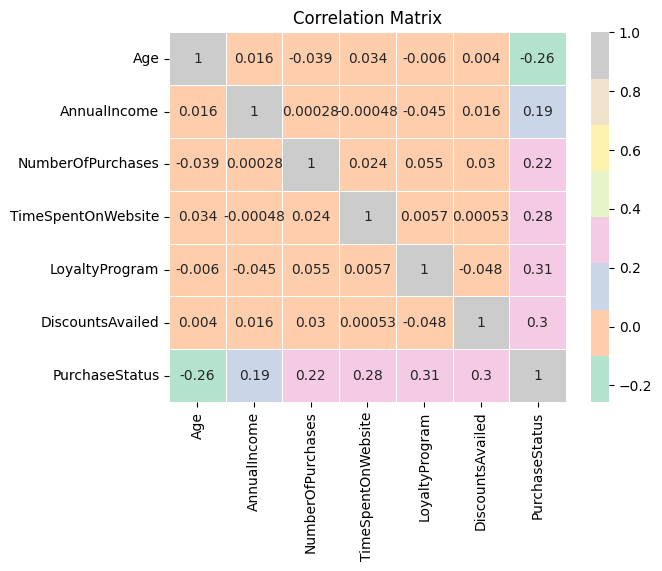

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## 1.1.2 Split Data into Training and Testing Sets
Split the data into training and testing sets so you can evaluate model performance on unseen data.

In [ ]:
# Split data into features (X) and target (y)
# X = df.drop('target_column', axis=1)

X = df.drop(columns=["PurchaseStatus"], axis=1)
X

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,-0.276761,-0.481928,-0.411185,0.000982,0,1.434172
1,-1.564418,-1.612828,-1.090830,0.472420,0,1.434172
2,-1.113738,1.158317,0.098548,0.059912,1,-1.499095
3,-1.306887,1.423543,1.457838,0.943858,0,0.847519
4,-0.856207,0.400121,1.457838,-0.647245,0,-1.499095
...,...,...,...,...,...,...
1495,-0.341143,-0.510426,0.438371,0.236701,0,1.434172
1496,1.461577,-1.474699,1.287927,-0.765105,0,-0.912442
1497,-0.276761,-0.714722,-0.581096,-1.059753,0,-1.499095
1498,1.204046,1.323136,0.948104,0.413490,1,-1.499095


In [ ]:
# Get the target column
y = df["PurchaseStatus"]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Selection
Choose a model to predict whether a customer will make a purchase. Here, we'll cover three models: Logistic Regression, Decision Tree, and Random Forest.

## 5.1 Logistic Regression
Logistic regression is a simple and commonly used linear model for binary classification.

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)


In [ ]:
# Print the model training score and testing score
print("Logistic Regression Training Score:", log_reg.score(X_train, y_train))
print("Logistic Regression Testing Score:", log_reg.score(X_test, y_test))


Logistic Regression Training Score: 0.8191666666666667
Logistic Regression Testing Score: 0.8433333333333334


In [ ]:
# print classification report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       172
           1       0.89      0.73      0.80       128

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.84      0.84       300



## 5.2 Decision Tree
Decision Trees are non-linear models that split the data into subsets based on feature values.

In [ ]:
# Create the decision tree classifier instance
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [ ]:
# Fit the model
dt_model = model.fit(X_train, y_train)

In [ ]:
# Making predictions using the testing data
y_pred_tree = dt_model.predict(X_test)

In [ ]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy Score : {acc_score}")

Decision Tree Accuracy Score : 0.9066666666666666


## 3.3 Random Forest
Random Forest is an ensemble of decision trees, generally providing better accuracy and robustness.

In [ ]:
# Initialize the Random Forest model
forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest.predict(X_test)


In [ ]:
# Print the model training score and testing score
print("Random Forest Training Score:", forest.score(X_train, y_train))
print("Random Forest Testing Score:", forest.score(X_test, y_test))


Random Forest Training Score: 1.0
Random Forest Testing Score: 0.9566666666666667


# 6. Model Evaluation

Define a Function for Evaluation
To avoid repetitive code, create a function that evaluates and prints these metrics for any model.
Evaluate each model using various metrics to determine their performance.

6.1 Evaluation Metrics
Common metrics for binary classification include:

Accuracy: Proportion of correct predictions.
Precision: Proportion of positive identifications that were actually correct.
Recall (Sensitivity): Proportion of actual positives that were identified correctly.
F1 Score: Harmonic mean of precision and recall.
ROC AUC: Area Under the Receiver Operating Characteristic Curve.

## 5. Model Comparison
After evaluating the models, compare their performance to choose the best one.

- Accuracy gives an overall measure of correct predictions.

- Precision focuses on the correctness of positive predictions.
- Recall measures the model's ability to identify all relevant cases (e.g., all purchases).
- F1 Score is the harmonic mean of precision and recall, providing a balanced measure when classes are imbalanced.
- ROC-AUC provides a measure of the model’s ability to distinguish between classes, independent of the decision threshold.

# 6. Model Selection Conclusion

- Logistic Regression is generally useful for simpler models when interpretability is essential.

- Decision Trees are great for understanding decision-making processes, though they can overfit without proper tuning.

- Random Forest often provides the best performance by averaging out the decisions of multiple trees, thus reducing overfitting.


Choose the model that provides the best balance of metrics based on your project goals. Once selected, you can further tune the model using hyperparameter optimization or deploy it for predictions in a production environment.

Evaluation Metrics for Logistic Regression:
Accuracy: 0.8433
Precision: 0.8857
Recall: 0.7266
F1 Score: 0.7983
ROC AUC Score: 0.8284


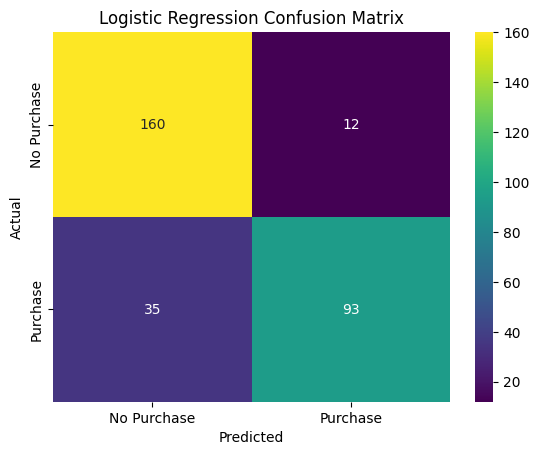

Evaluation Metrics for Decision Tree:
Accuracy: 0.9067
Precision: 0.9386
Recall: 0.8359
F1 Score: 0.8843
ROC AUC Score: 0.8976


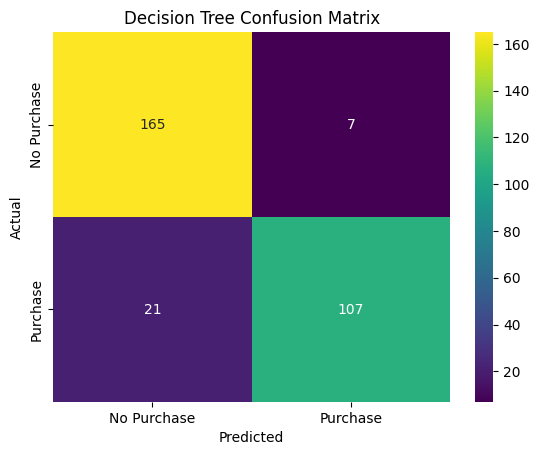

Evaluation Metrics for Random Forest:
Accuracy: 0.9567
Precision: 0.9915
Recall: 0.9062
F1 Score: 0.9469
ROC AUC Score: 0.9502


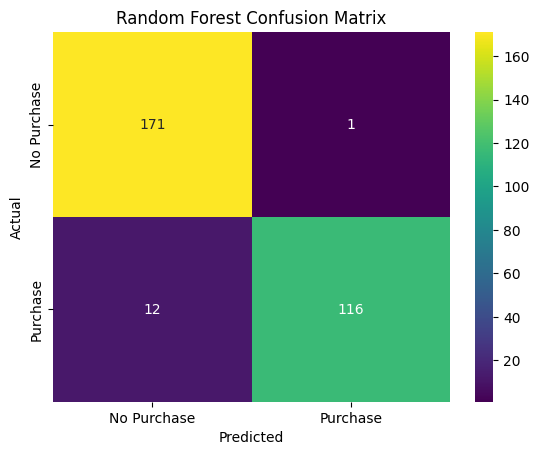

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest")


Evaluation Metrics for Logistic Regression (with Percentages):
Accuracy: 0.8433
Precision: 0.8857
Recall: 0.7266
F1 Score: 0.7983
ROC AUC Score: 0.8284


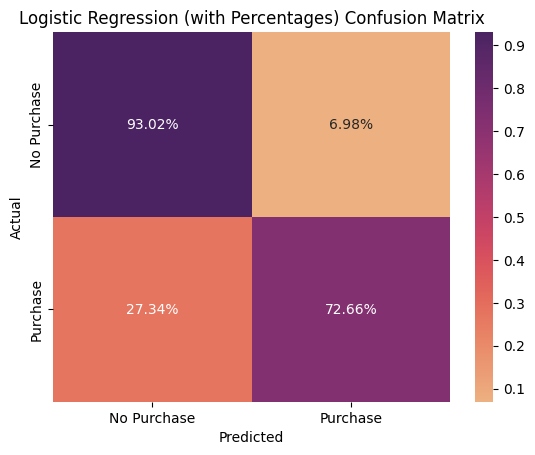

Evaluation Metrics for Decision Tree (with Percentages):
Accuracy: 0.9067
Precision: 0.9386
Recall: 0.8359
F1 Score: 0.8843
ROC AUC Score: 0.8976


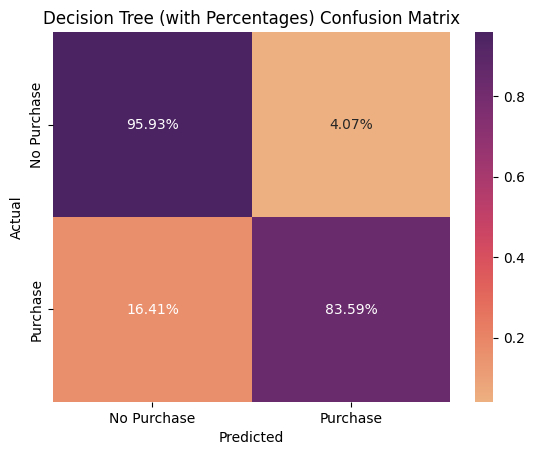

Evaluation Metrics for Random Forest(with Percentages):
Accuracy: 0.9567
Precision: 0.9915
Recall: 0.9062
F1 Score: 0.9469
ROC AUC Score: 0.9502


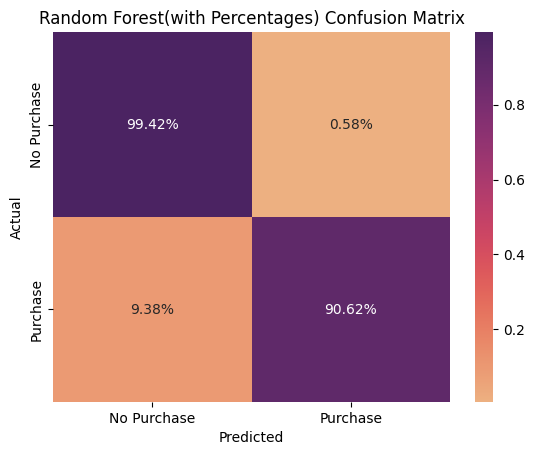

In [ ]:
def evaluate_model_percent (y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='flare', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression
evaluate_model_percent(y_test, y_pred_log_reg, "Logistic Regression (with Percentages)")

# Evaluate Decision Tree
evaluate_model_percent(y_test, y_pred_tree, "Decision Tree (with Percentages)")

# Evaluate Random Forest
evaluate_model_percent(y_test, y_pred_forest, "Random Forest(with Percentages)")


# Best features

1. Feature Importance in Tree-Based Models
Tree-based models like Random Forest, Gradient Boosting, and Decision Trees provide a built-in way to measure the importance of each feature based on how much they contribute to reducing the impurity (e.g., Gini impurity or entropy) in the decision trees.

## 1.1 Random Forest Feature Importance:

<Axes: >

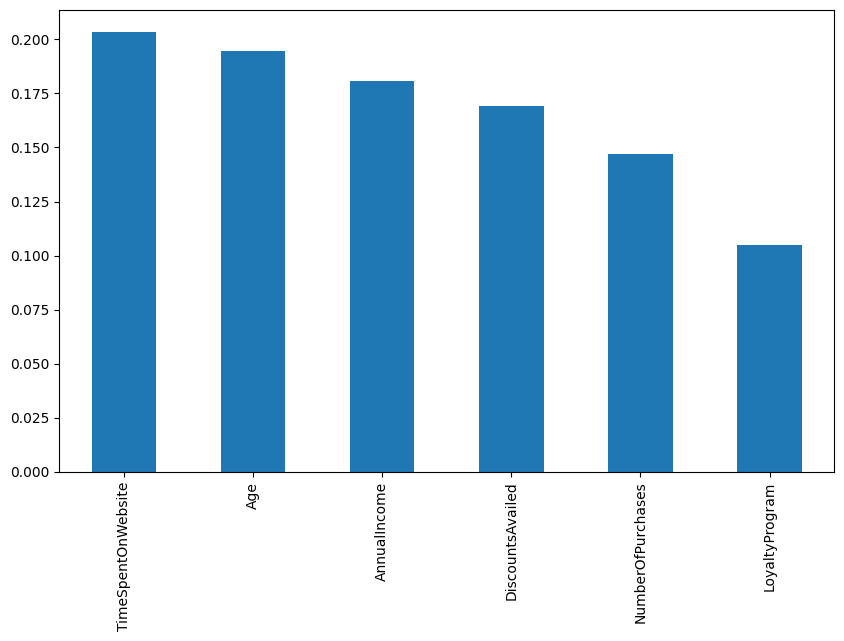

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))


<Axes: >

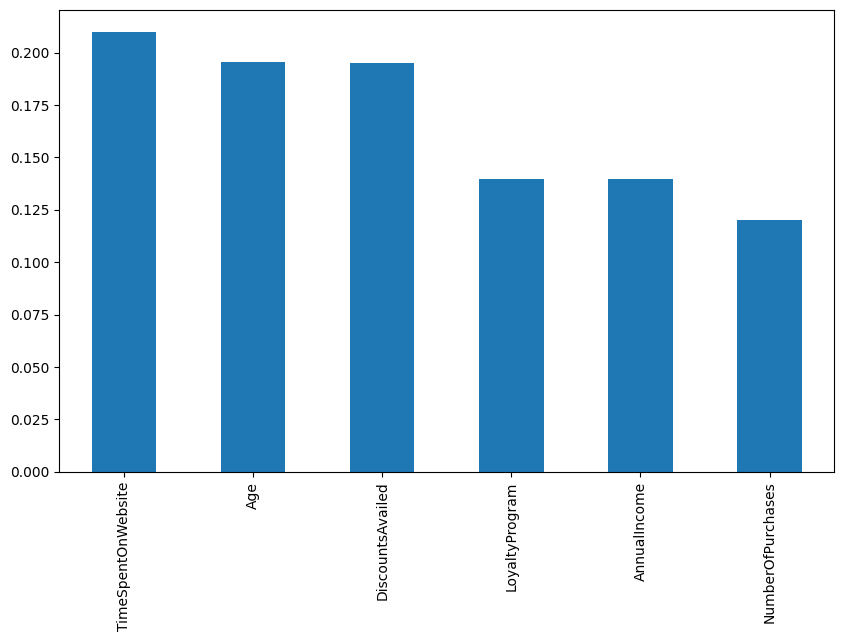

In [ ]:
# ## 1.2 Gradient Boosting Feature Importance:

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))


## 2. Permutation Feature Importance
Permutation importance involves shuffling the values of a feature column and observing how much the model's performance metric (e.g., accuracy, AUC) changes. A larger drop in performance indicates that the feature is important.

<Axes: >

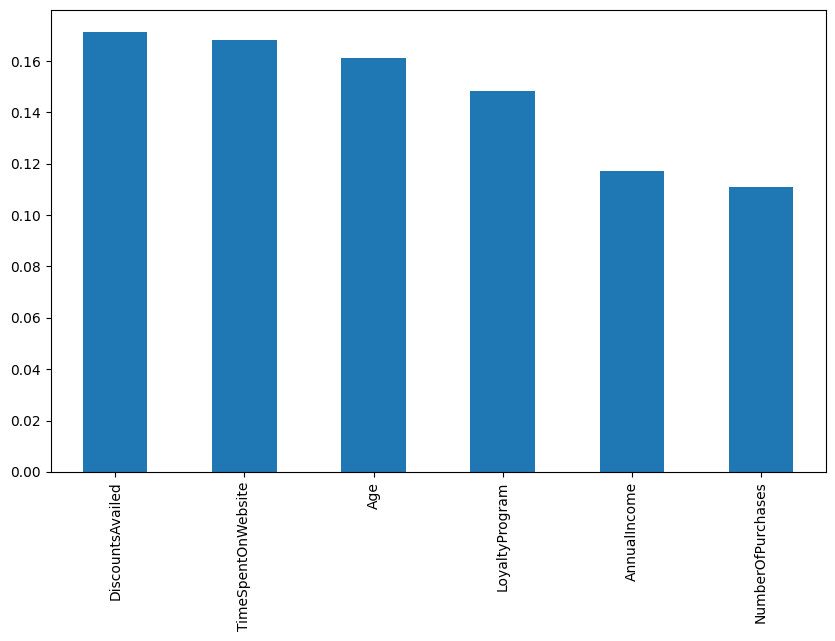

In [ ]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)
sorted_importances.plot(kind='bar', figsize=(10, 6))


## 6. Recursive Feature Elimination (RFE)
Recursive Feature Elimination is a method that recursively removes the least important feature(s) and re-trains the model until the optimal number of features is reached

Features ranked "1" are the most important ones according to the RFE process.



<Axes: >

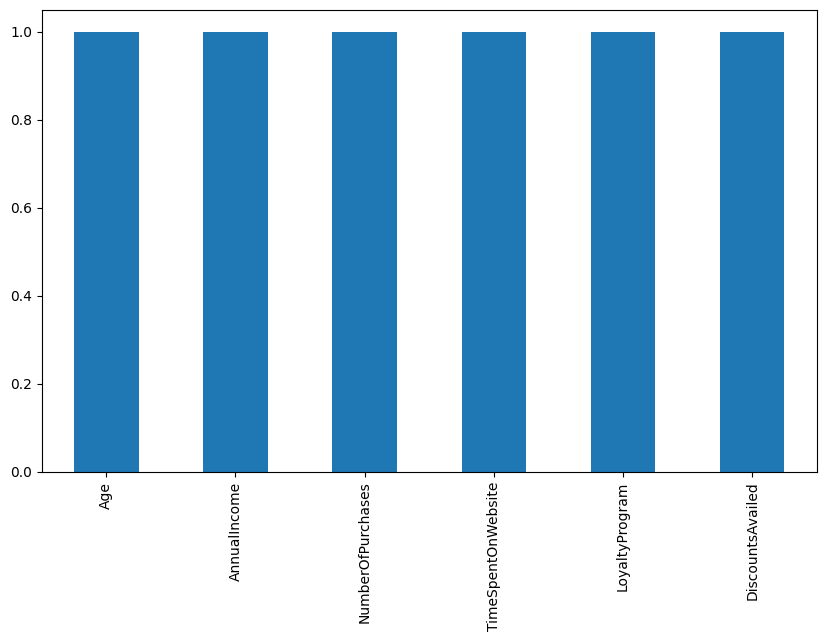

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Adjust the number of features
rfe.fit(X_train, y_train)

# Features ranking
ranking = pd.Series(rfe.ranking_, index=X_train.columns)
ranking.sort_values().plot(kind='bar', figsize=(10, 6))


# Model Optimization

## 4. Ensemble Methods
Combine the Random Forest model with other models to create a more robust ensemble. Stacking is a method where you combine the predictions of multiple models (e.g., Random Forest, Logistic Regression, Gradient Boosting) using another model as a "meta-learner."


Evaluation Metrics for Stacking Model:
Accuracy: 0.9533
Precision: 0.9831
Recall: 0.9062
F1 Score: 0.9431
ROC AUC Score: 0.9473


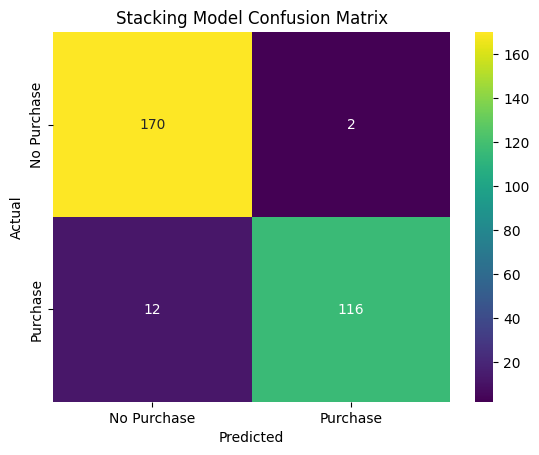

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000))
]

# Define stacking model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacked model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_stack = stacking_clf.predict(X_test)
evaluate_model(y_test, y_pred_stack, "Stacking Model")

# Plot feature importance
stacking_clf.plot_importance(stacking_clf)
plt.show()


In [ ]:
# Print the stacking model training and testing scores
print("Stacking Model Training Score:", stacking_clf.score(X_train, y_train))
print("Stacking Model Testing Score:", stacking_clf.score(X_test, y_test))

Stacking Model Training Score: 0.9966666666666667
Stacking Model Testing Score: 0.9533333333333334


In [ ]:
# plot feature importances for stacking_clf model




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importances = pd.Series(stacking_clf.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.viridis(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


AttributeError: 'StackingClassifier' object has no attribute 'feature_importances_'

## 10. Use Advanced Ensembles or Boosting
Consider Advanced Ensemble Methods like XGBoost or LightGBM. These models can outperform Random Forests by focusing on correcting errors from previous iterations.

Evaluation Metrics for XGBoost:
Accuracy: 0.9567
Precision: 0.9915
Recall: 0.9062
F1 Score: 0.9469
ROC AUC Score: 0.9502


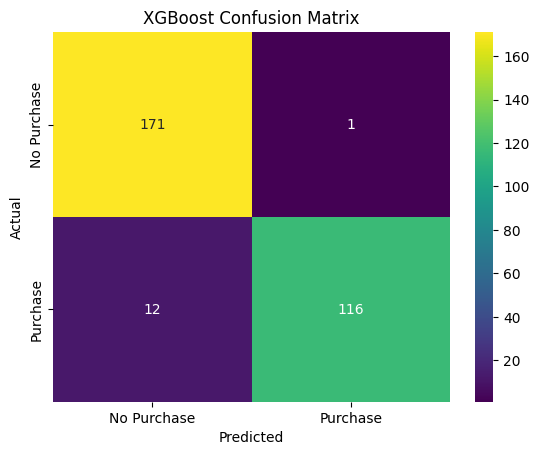

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")


In [ ]:
# Print xgb_model training and testing score
print("XGBoost Model Training Score:", xgb_model.score(X_train, y_train))


XGBoost Model Training Score: 0.9983333333333333


In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()

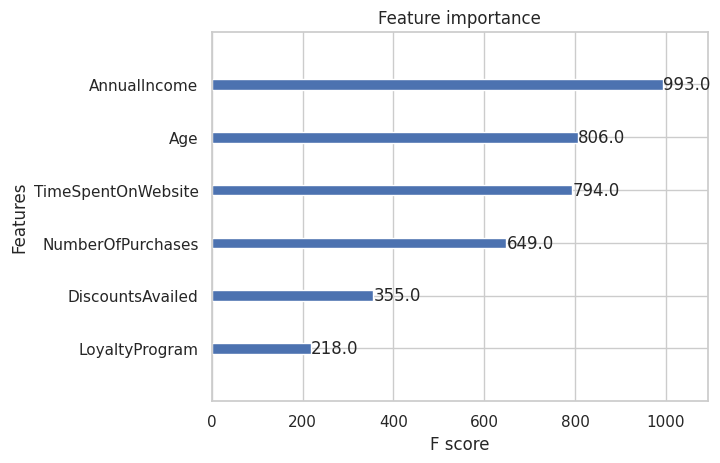

In [ ]:
# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()

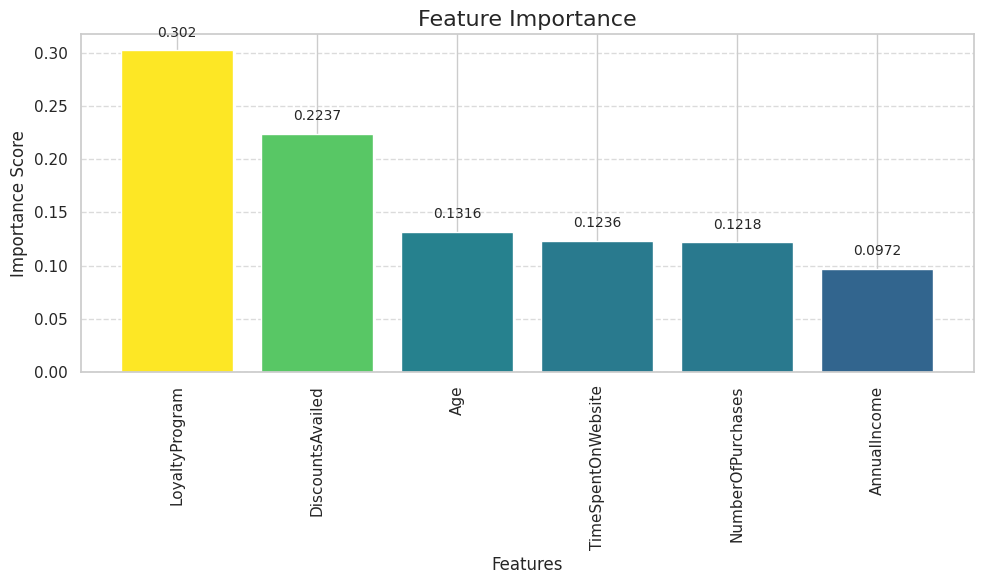

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.viridis(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


In [ ]:
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

,0
LoyaltyProgram,0.302042
DiscountsAvailed,0.223716
Age,0.131564
TimeSpentOnWebsite,0.123613
NumberOfPurchases,0.121843
AnnualIncome,0.097222


## 1.2. Random Search
Random Search is a more efficient approach that samples random combinations of hyperparameters and is particularly useful when the parameter grid is large.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='f1', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Use the best model
best_forest = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 447}


## 3. Feature Selection
Remove less important features to reduce noise and potential overfitting. You can use techniques like Recursive Feature Elimination (RFE) or SelectFromModel to select only the most impactful features.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Use the trained random forest to select important features
selector = SelectFromModel(best_forest, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Refit the model with the selected features
best_forest.fit(X_train_selected, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=447, random_state=42)

In [ ]:
# Initialize the Random Forest model
forest_rs = RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=447, random_state=42)

# Train the model
forest_rs.fit(X_train, y_train)

# Predict on the test set
y_pred_forest_rs = forest_rs.predict(X_test)

In [ ]:
# Print the model training score and testing score
print("RS Random Forest Training Score:", forest_rs.score(X_train, y_train))
print("RS Random Forest Testing Score:", forest_rs.score(X_test, y_test))


RS Random Forest Training Score: 0.9725
RS Random Forest Testing Score: 0.95


Evaluation Metrics for RS Random Forest:
Accuracy: 0.9500
Precision: 0.9748
Recall: 0.9062
F1 Score: 0.9393
ROC AUC Score: 0.9444


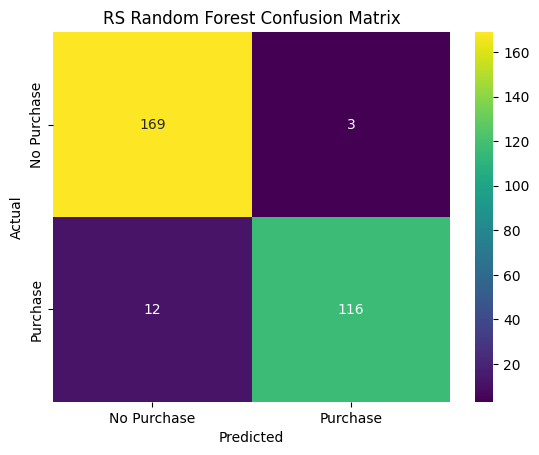

In [ ]:
# evaluate forest_rs model
evaluate_model(y_test, y_pred_forest_rs, "RS Random Forest")

In [ ]:
feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

,0
TimeSpentOnWebsite,0.203998
Age,0.185685
DiscountsAvailed,0.181936
AnnualIncome,0.156703
NumberOfPurchases,0.139254
LoyaltyProgram,0.132424


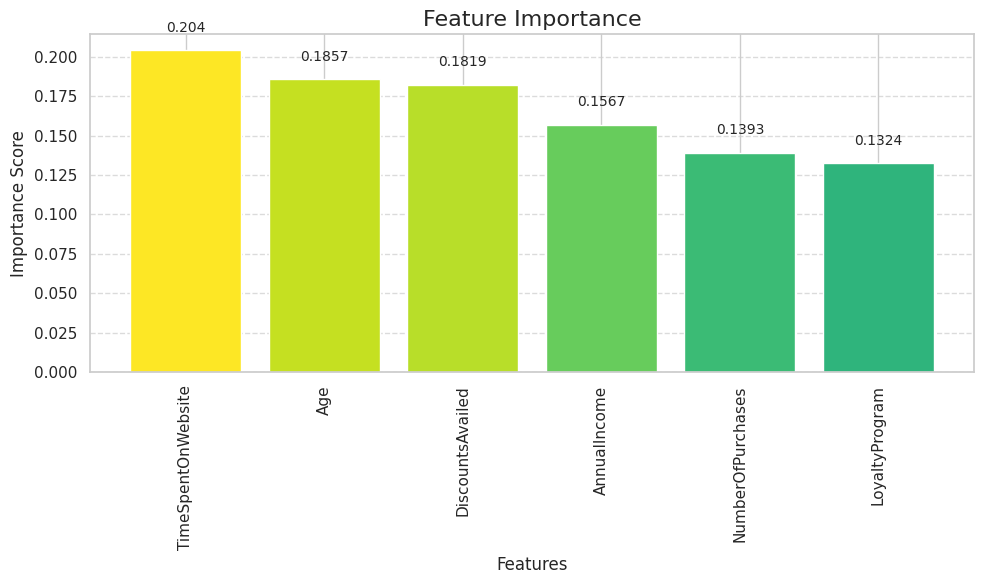

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.viridis(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


# 5. Class Imbalance Handling
If your dataset has a class imbalance (e.g., far more "no purchase" cases than "purchase" cases), consider techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create a balanced training set.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on balanced data
best_forest.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_forest_smote = best_forest.predict(X_test)

In [ ]:
# Print the model training score and testing score
print("Smote Random Forest Training Score:", best_forest.score(X_train, y_train))
print("Smote Random Forest Testing Score:", best_forest.score(X_test, y_test))

Smote Random Forest Training Score: 0.9741666666666666
Smote Random Forest Testing Score: 0.9566666666666667


In [ ]:
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

,0
TimeSpentOnWebsite,0.194094
Age,0.193980
DiscountsAvailed,0.192347
AnnualIncome,0.143550
NumberOfPurchases,0.138833
LoyaltyProgram,0.137196


Evaluation Metrics for Smote Random Forest:
Accuracy: 0.9567
Precision: 0.9752
Recall: 0.9219
F1 Score: 0.9478
ROC AUC Score: 0.9522


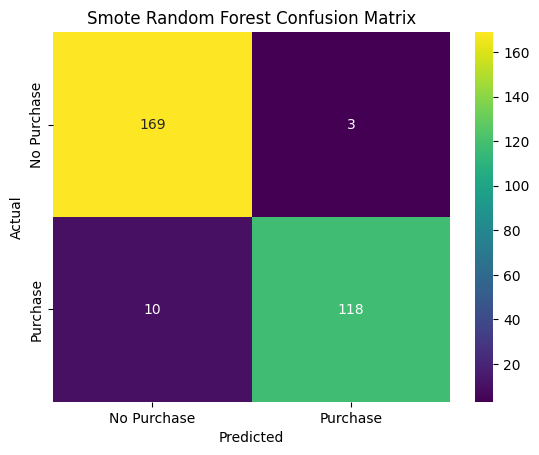

In [ ]:
# evaluate forest_rs model
evaluate_model(y_test, y_pred_forest_smote, "Smote Random Forest")

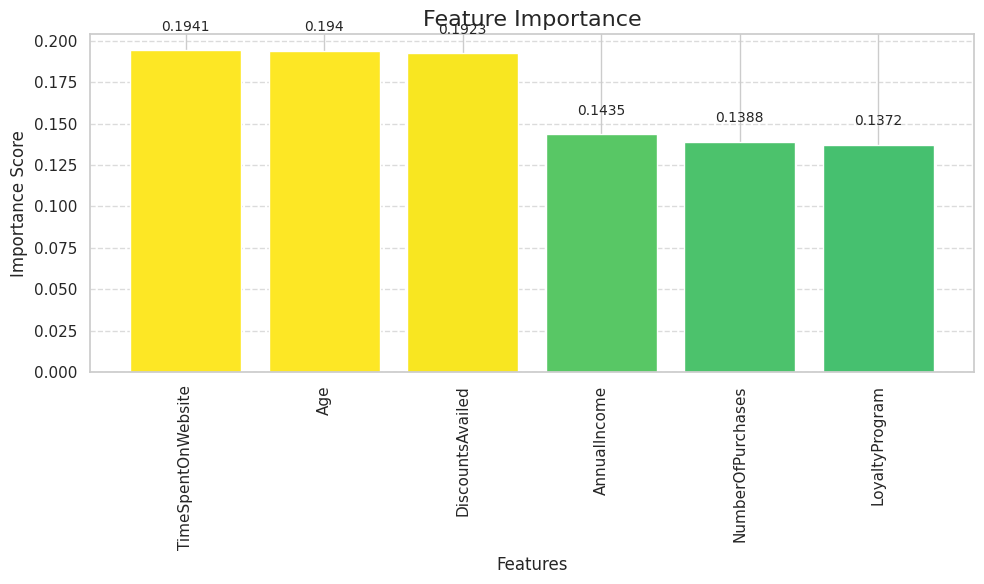

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `best_forest` is your trained Random Forest model
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.viridis(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


# Vis Results

In [ ]:
# Create the DataFrame
data = {
    'Score Type': ['Training', 'Testing', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Initial': [100.00, 95.67, 95.67, 99.15, 90.62, 94.69, 95.02],
    'Stacking': [99.67, 95.33, 95.33, 98.31, 90.62, 94.31, 94.73],
    'XGBoost': [99.83, 95.67, 95.67, 99.15, 90.62, 94.69, 95.02],
    'Random Search': [97.25, 95.00, 95.00, 97.48, 90.62, 93.93, 94.44],
    'SMOTE': [97.42, 95.67, 95.67, 97.52, 92.19, 94.78, 95.22]
}

df_results = pd.DataFrame(data)

# Display the DataFrame
print(df_results)


  Score Type  Initial  Stacking  XGBoost  Random Search  SMOTE
0   Training   100.00     99.67    99.83          97.25  97.42
1    Testing    95.67     95.33    95.67          95.00  95.67
2   Accuracy    95.67     95.33    95.67          95.00  95.67
3  Precision    99.15     98.31    99.15          97.48  97.52
4     Recall    90.62     90.62    90.62          90.62  92.19
5   F1 Score    94.69     94.31    94.69          93.93  94.78
6    ROC AUC    95.02     94.73    95.02          94.44  95.22


In [ ]:
# Melt the DataFrame
df_results_melted = df_results.melt(id_vars='Score Type', var_name='Model', value_name='Score')

# Display the melted DataFrame
print(df_results_melted.head())


  Score Type    Model   Score
0   Training  Initial  100.00
1    Testing  Initial   95.67
2   Accuracy  Initial   95.67
3  Precision  Initial   99.15
4     Recall  Initial   90.62


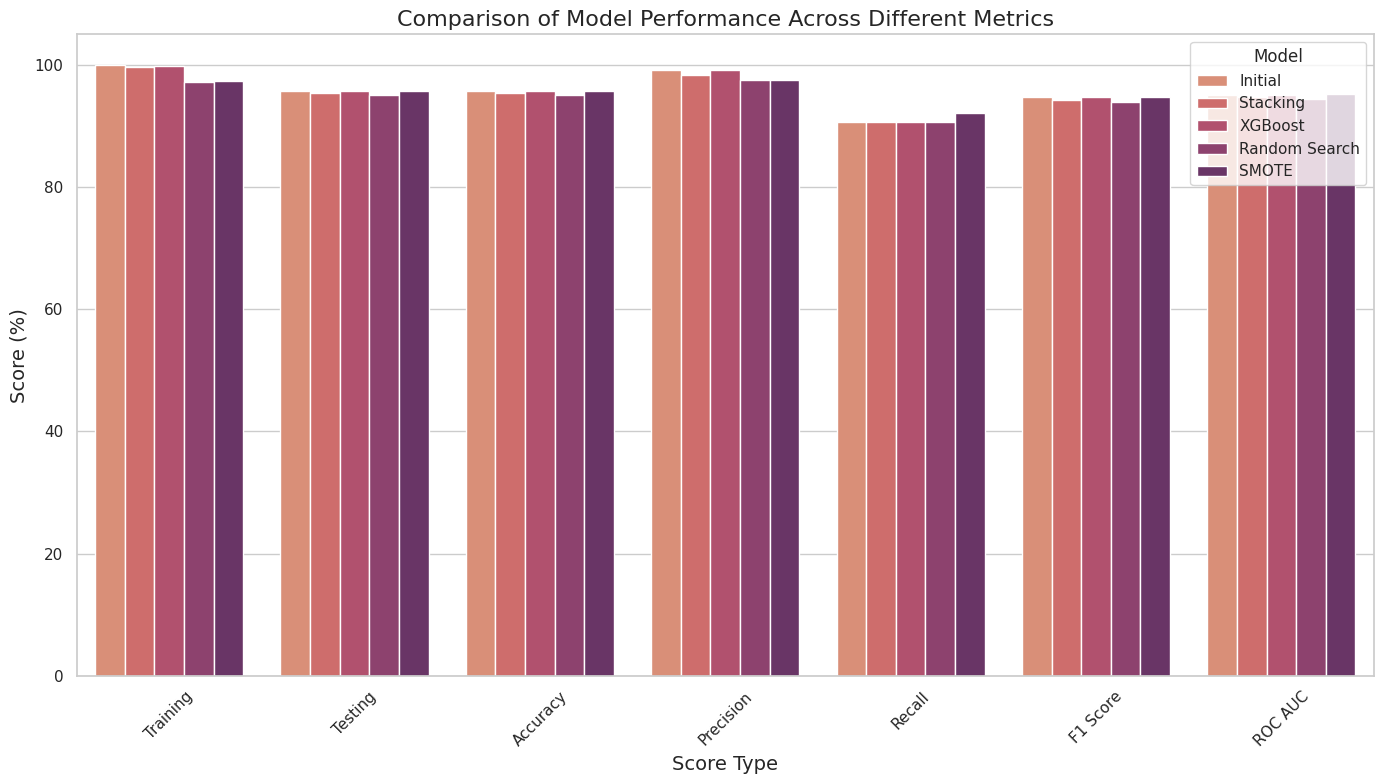

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Score Type', y='Score', hue='Model', data=df_results_melted, palette='flare')

# Add title and labels
plt.title('Comparison of Model Performance Across Different Metrics', fontsize=16)
plt.xlabel('Score Type', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


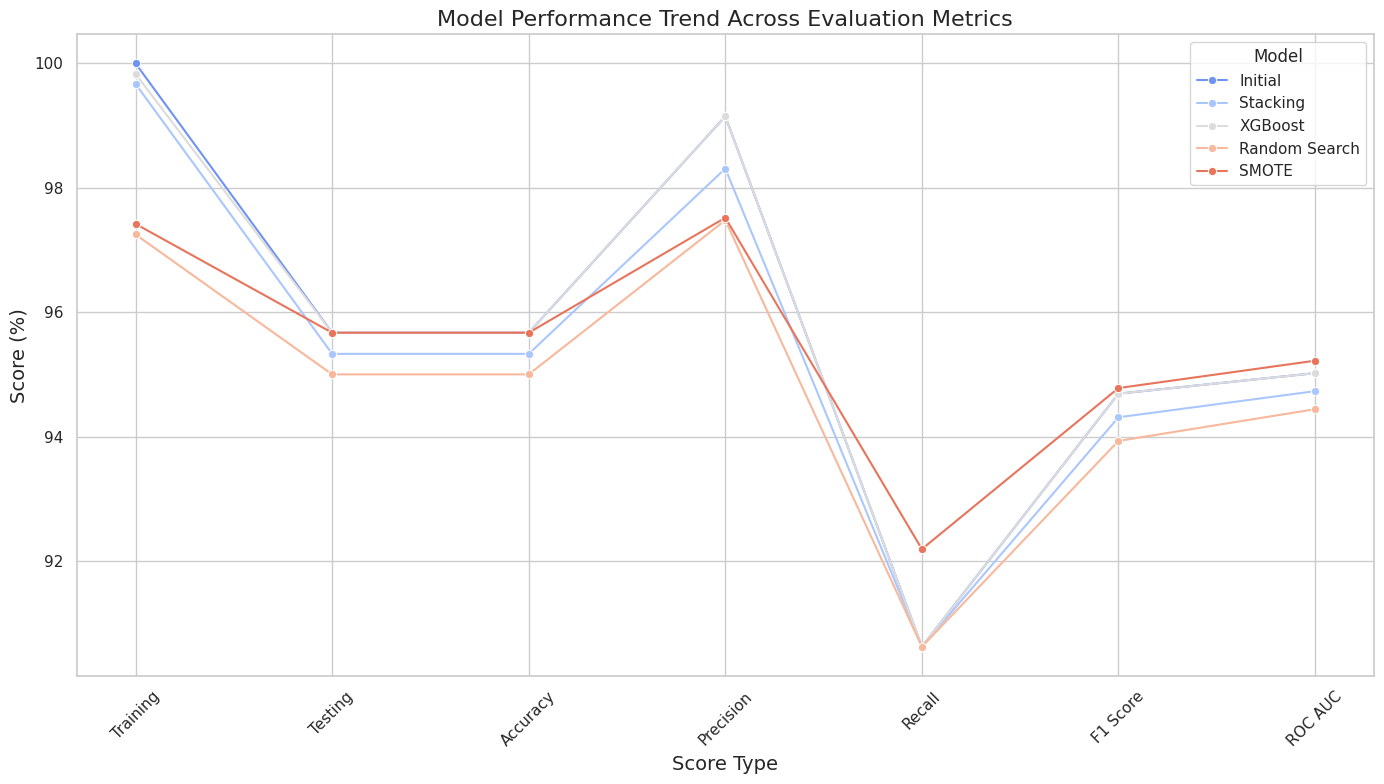

In [ ]:
# Line plot to show trends across different models
plt.figure(figsize=(14, 8))

# Plot each model's performance
sns.lineplot(x='Score Type', y='Score', hue='Model', marker='o', data=df_results_melted, palette='coolwarm')

# Add title and labels
plt.title('Model Performance Trend Across Evaluation Metrics', fontsize=16)
plt.xlabel('Score Type', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


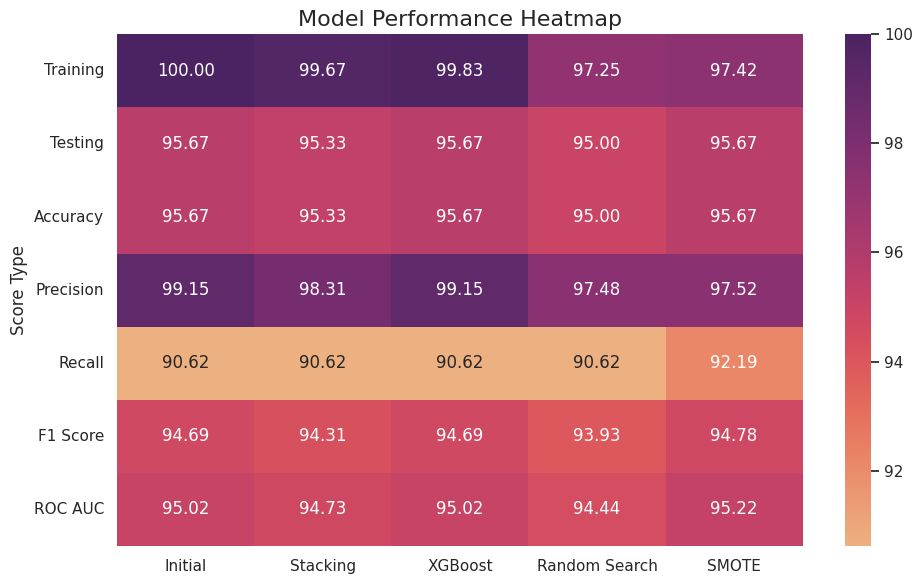

In [ ]:
# Set the index to Score Type for easier plotting in heatmap
df_results_heatmap = df_results.set_index('Score Type')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_results_heatmap, annot=True, cmap='flare', fmt='.2f')

# Add title
plt.title('Model Performance Heatmap', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
